# Statistial Inference in Python

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Chapter 6 in the Book

## Create two empty vectors, x1 and x2. Now do a for loop 100 times, where you for each iteration: 
## 1) Take the mean of 100 samples from $N(10, 5)$ and store it in x1. 
## 2) Take the mean of 100 samples from $N(10, 20)$ and store it in x2.

## So, your vectors x1 and x2 should contain 100 values. 

## From p.148 in the book, we know that the mean is an unbiased estimate of the fixed, but unknown $\mu$. The nice thing is that in our Monte Carlo Simulation we know the true $\mu$. Plot histograms of x1 and x2 and comment on the result, do we on "average" get the right mean? Is it easier or harder to estimate the mean when the variance is low/high? How is this knowledge useful in reality?

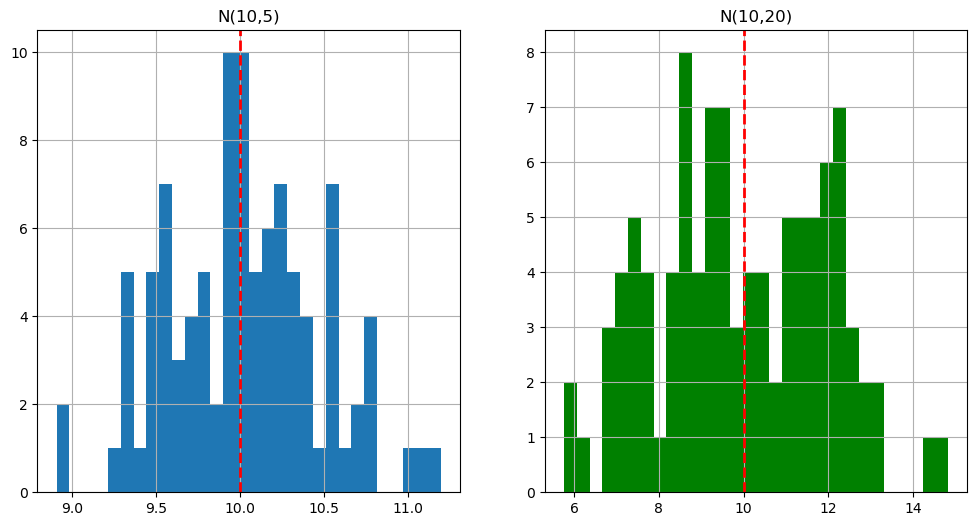

In [12]:
x1=[]
x2=[]

for i in range(100):
    stickprov_mean_1 = np.mean(np.random.normal(10, 5, 100))
    x1.append(stickprov_mean_1)
    stickprov_mean_2 = np.mean(np.random.normal(10, 20, 100))
    x2.append(stickprov_mean_2)

fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].hist(x1, bins= 30)
axs[0].set_title('N(10,5)')
axs[0].grid(True)
axs[0].axvline(x=10, color='red', linestyle='dashed', linewidth=2)

axs[1].hist(x2, bins = 30, color='green')
axs[1].set_title('N(10,20)')
axs[1].grid(True)
axs[1].axvline(x=10, color='red', linestyle='dashed', linewidth=2)
plt.show()


Ja, medelvärdet är korrekt, det vill säga 10. När variansen är större blir det svårare att uppskatta medelvärdet. 

Med hög varians blir uppskattningarna av medelvärdet mer variabla, och därför kan det vid individuella provningar vara svårare att exakt träffa medelvärdet.

I verkligheten kan variansen ha stor betydelse för hur ett experiment utformas. När variansen är låg kanske färre stickprov behövs, och när variansen är hög kan det krävas större stickprovsstorlekar.

## Redo the same analysis as above but with 10000 generated samples and see if there is any difference (copy the code from above). Comment on the results. 

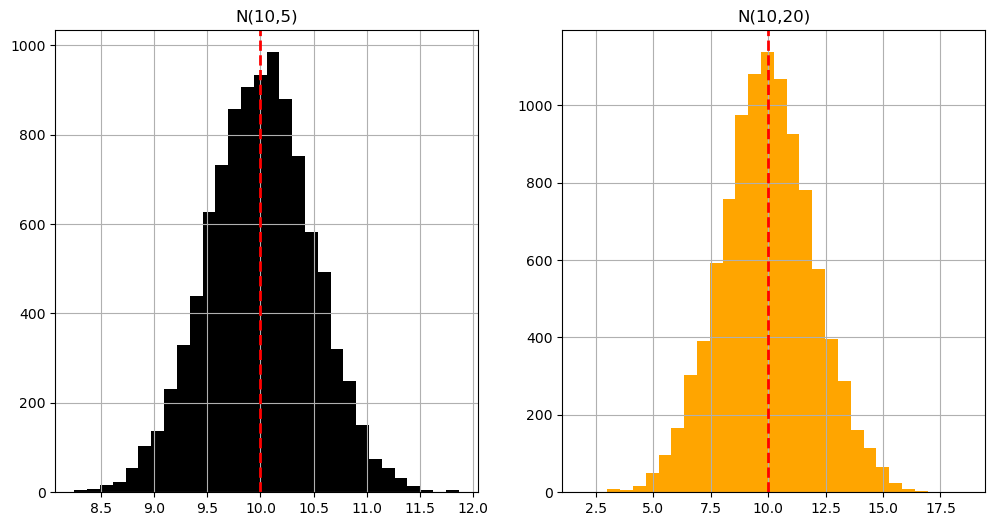

In [13]:
x1=[]
x2=[]

for i in range(10000):
    stickprov_mean_1 = np.mean(np.random.normal(10, 5, 100))
    x1.append(stickprov_mean_1)
    stickprov_mean_2 = np.mean(np.random.normal(10, 20, 100))
    x2.append(stickprov_mean_2)

fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].hist(x1, bins= 30, color='black')
axs[0].set_title('N(10,5)')
axs[0].grid(True)
axs[0].axvline(x=10, color='red', linestyle='dashed', linewidth=2)

axs[1].hist(x2, bins = 30, color='orange')
axs[1].set_title('N(10,20)')
axs[1].grid(True)
axs[1].axvline(x=10, color='red', linestyle='dashed', linewidth=2)
plt.show()


Den större mängden prov har gjort så att det finns en tydligare bild av normalfördelade data, även om variansen är större.

# Chapter 7 - Confidence Intervals

Assuming $X$ is $N(10, 3)$, we know (see example calculation below) that a random sample x will with probability 95% be between: <br>
ci_lower = 10 - 1.96 x 3 <br> and <br>
ci_upper = 10 + 1.96 x 3

Example, for the ci_upper, we do the following calculation: $P(X > ci\_upper) = P(X > 10 + 1.96 * 3) = P(Z > 1.96) = 0.025$ where we used the usual standardization. 

This means that if you get observations from the normal distribution above, you would "expect" 95 \% of them to be between ci_lower and ci_upper. 

Your task is now to simulate 10, 100, 1000 and 10000 normally distributed samples from $N(10, 3)$ and check the relative frequency (\%) of how many samples fall outside the confidence interval. How many \% should it theoretically be?

4.12
15.879999999999999



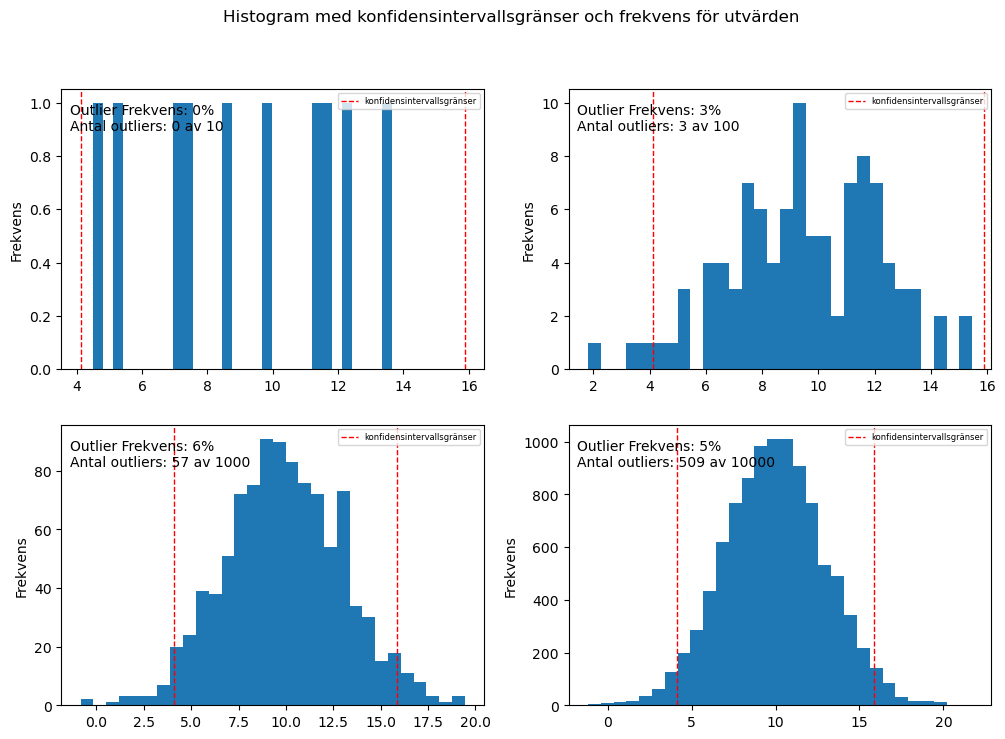

In [16]:
ci_lower = 10 - 1.96*3
ci_upper = 10 + 1.96*3
print(ci_lower)
print(ci_upper)
print()
#Relativ frekvens provstorlek 10
x1 = scipy.stats.norm.rvs(loc=10, scale=3, size=10)
outliers1 = np.sum((x1 < ci_lower) | (x1 > ci_upper))
outlier_frekvens1 = round((outliers1 / len(x1)) * 100)

#Histogram provstorlek 10 högst till vänster
fig, axs = plt.subplots(2,2, figsize=(12,8)) 
fig.suptitle('Histogram med konfidensintervallsgränser och frekvens för utvärden')
axs[0, 0].hist(x1, bins=30)
axs[0, 0].axvline(ci_lower, color='red', linestyle='dashed', linewidth=1)
axs[0, 0].axvline(ci_upper, color='red', linestyle='dashed', linewidth=1, label='konfidensintervallsgränser')
axs[0, 0].set_ylabel('Frekvens')
outlier_text = f'Outlier Frekvens: {outlier_frekvens1}%\nAntal outliers: {outliers1} av {len(x1)}'
axs[0, 0].text(0.02, 0.95, outlier_text, transform=axs[0, 0].transAxes, 
               fontsize=10, verticalalignment='top', horizontalalignment='left')
axs[0,0].legend(loc='upper right', fontsize=6)

#Relativ frekvens provstorlek 100
x2 = scipy.stats.norm.rvs(loc=10, scale=3, size=100)
outliers2 = np.sum((x2 < ci_lower) | (x2 > ci_upper))
outlier_frekvens2 = round((outliers2 / len(x2)) * 100)

#Histogram provstorlek 100 högst till höger
axs[0, 1].hist(x2, bins=30)
axs[0, 1].axvline(ci_lower, color='red', linestyle='dashed', linewidth=1)
axs[0, 1].axvline(ci_upper, color='red', linestyle='dashed', linewidth=1, label='konfidensintervallsgränser')
axs[0, 1].set_ylabel('Frekvens')
outlier_text = f'Outlier Frekvens: {outlier_frekvens2}%\nAntal outliers: {outliers2} av {len(x2)}'
axs[0, 1].text(0.02, 0.95, outlier_text, transform=axs[0, 1].transAxes, 
               fontsize=10, verticalalignment='top', horizontalalignment='left')
axs[0,1].legend(loc='upper right', fontsize=6)

#Relativ frekvens provstorlek 1 000
x3 = scipy.stats.norm.rvs(loc=10, scale=3, size=1000)
outliers3 = np.sum((x3 < ci_lower) | (x3 > ci_upper))
outlier_frekvens3 = round((outliers3 / len(x3)) * 100)

#Histogram provstorlek 1 000 längst ner till vänster
axs[1, 0].hist(x3, bins=30)
axs[1, 0].axvline(ci_lower, color='red', linestyle='dashed', linewidth=1)
axs[1, 0].axvline(ci_upper, color='red', linestyle='dashed', linewidth=1, label='konfidensintervallsgränser')
axs[1, 0].set_ylabel('Frekvens')
outlier_text = f'Outlier Frekvens: {outlier_frekvens3}%\nAntal outliers: {outliers3} av {len(x3)}'
axs[1, 0].text(0.02, 0.95, outlier_text, transform=axs[1, 0].transAxes, 
               fontsize=10, verticalalignment='top', horizontalalignment='left')
axs[1,0].legend(loc='upper right', fontsize=6)

#Relativ frekvens provstorlek 10 000
x4 = scipy.stats.norm.rvs(loc=10, scale=3, size=10000)
outliers4 = np.sum((x4 < ci_lower) | (x4 > ci_upper))
outlier_frekvens4 = round((outliers4 / len(x4)) * 100)

#Histogram provstorlek 10 000 längst ner till vänster
axs[1, 1].hist(x4, bins=30)
axs[1, 1].axvline(ci_lower, color='red', linestyle='dashed', linewidth=1)
axs[1, 1].axvline(ci_upper, color='red', linestyle='dashed', linewidth=1, label='konfidensintervallsgränser')
axs[1, 1].set_ylabel('Frekvens')
outlier_text = f'Outlier Frekvens: {outlier_frekvens4}%\nAntal outliers: {outliers4} av {len(x4)}'
axs[1, 1].text(0.02, 0.95, outlier_text, transform=axs[1, 1].transAxes, 
               fontsize=10, verticalalignment='top', horizontalalignment='left')
axs[1,1].legend(loc='upper right', fontsize=6)

plt.show()
  


Teoretiskt sett bör outlierfrekvensen vara 5% eftersom det är ett 95% konfidensintervall. Ju större provstorleken är, desto närmare kommer frekvensen att vara 5%. Likaså ser det mer ut som normaldistribution desto fler prov som tas.

## Assume you have 100 observations from N(10, 3), you calculate a confidence interval and check if it "captures" the real $\mu$ (we know the reality since we are doing a monte carlo simulation), how often do you "capture" the real mu (in \%) when you repeat this 1000 times? How is this knowledge useful in reality?

## Note, the difference between this question and the one above is that here we calculate the sample mean and sample standard deviation to construct confidence intervals whereas above we used that we "knew the reality" ($\mu$ and $\sigma$), i.e. ci_lower <- 10 - 1.96*3 and  ci_upper <- 10 + 1.96*3. Obviosuly, this is not the case in reality.


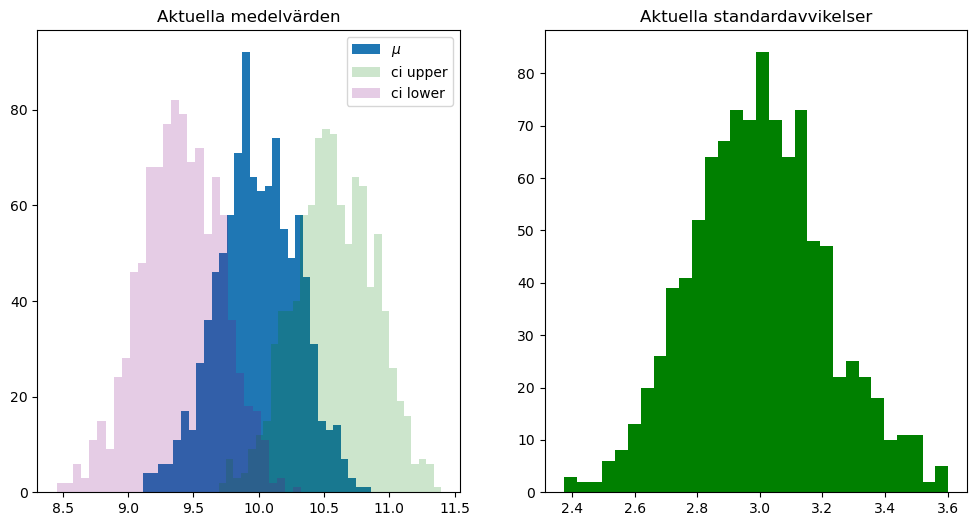

In [17]:
medelvärden =[]
s_värden=[]
ci_upper=[]
ci_lower=[]
for i in range(1000):
    stickprov = scipy.stats.norm.rvs(loc=10, scale=3, size=100)
    
    stickprov_medelvärdet= np.mean(stickprov)
    medelvärden.append(stickprov_medelvärdet)
    
    stickprov_std = np.std(stickprov)
    s_värden.append(stickprov_std)
    
    ci_lower.append(stickprov_medelvärdet - 1.96*((stickprov_std)/len(stickprov)**0.5))
    ci_upper.append(stickprov_medelvärdet + 1.96*((stickprov_std)/len(stickprov)**0.5))


fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].hist(medelvärden, bins=30, label='$\mu$')
axs[0].set_title('Aktuella medelvärden')
axs[0].hist(ci_upper, bins=30, alpha=0.2, color='green', label='ci upper')
axs[0].hist(ci_lower, bins=30, alpha=0.2, color='purple', label='ci lower')
axs[0].legend(loc='upper right', fontsize=10)

axs[1].hist(s_värden, bins=30, color='green')
axs[1].set_title('Aktuella standardavvikelser')

plt.show()

Detta hjälper oss att förstå att även om vi inte kan vara helt säkra varje gång, ger konfidensintervall oss en bra gissning om var det rätta medelvärdet ligger. I verkligheten används det för att göra pålitliga uppskattningar från data vi samlar in.

## Confidence Intervals for proportions. 
So far, we have looked at confidence intervals for $\mu$. Often, we are also interested in proportions, $\pi$, this is for instance the case in elections that get much attention at TV and "nyhetsmorgon". 

## Assume we ask 1000 people who they will vote for and 4.2% answer Centerpartiet (C). Create a 90% Confidence Interval to get the proportion that would vote for C if we surveyed the whole population ("Totalundersökning"). OBS: note we want a 90% confidence interval.

In [18]:
p=.042
n=1000

standard_error = np.sqrt((p*(1-p))/n)

ci_lower = p -1.6449 * standard_error
ci_upper = p + 1.6449 * standard_error

print(f'Nedre konfidensintervall: {ci_lower}\nÖvre konfidensintervall: {ci_upper}')


Nedre konfidensintervall: 0.031566094467632935
Övre konfidensintervall: 0.05243390553236707


## For this question see (p. 177 - 178) in the book. We ask 1000 people who they will vote for, 4.2% answer Centerpartiet (C) and 4.5% answer Liberalerna (L), is there a statistical significant difference between the two parties? 

## Check if the assumption on  np(1-p) > 5 is satisfied for both poportions.

In [32]:
p_centerpartiet = 0.042 
p_liberalerna = 0.045
n = 1000     

if (n * p_centerpartiet * (1 - p_centerpartiet)) > 5 and (n * p_liberalerna * (1 - p_liberalerna)) > 5:
    standard_error = np.sqrt((p_centerpartiet * (1 - p_centerpartiet) / n) + 
                             (p_liberalerna * (1 - p_liberalerna) / n))

    ci_lower = (p_centerpartiet - p_liberalerna) - 1.96 * standard_error
    ci_upper = (p_centerpartiet - p_liberalerna) + 1.96 * standard_error
    
    if ci_lower > 0 or ci_upper < 0:
        print("Statistik skillnad finns.")
    else:
        print("Kan inte notera statistisk skillnad då 0 är i intervallet.")
    
else:
    raise ValueError ('Villkoret np(1-p)>5 är inte uppfyllt')
    

Kan inte notera statistisk skillnad då 0 är i intervallet.


# Chapter 8 - Hypothesis Testing
In the code below, can we reject the hypothesis that $\mu = 5$ ? Can we reject the hypothesis that $\mu = 0$ ? How do you interpret the p-value?

Read the following documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html to understand the function. 

In [33]:
x = scipy.stats.norm.rvs(loc = 0, scale = 4, size = 100)

In [34]:
print(scipy.stats.ttest_1samp(x, 5))

TtestResult(statistic=-11.30153513255958, pvalue=1.6259801780177e-19, df=99)


In [35]:
print(scipy.stats.ttest_1samp(x, 0))

TtestResult(statistic=0.6265668432633618, pvalue=0.5323853588903751, df=99)


$\mu$ = 5: Pvärdet är väldigt nära till 0 så vi förkastar nollhypotes $\mu$ = 5.

$\mu$ = 0: Pvärder är 0,53 som är högre än 0,05 så vi förkastar inte nollhypotes $\mu$ = 0. Det finns inte tillräckligt med bevis.
